In [2]:
import pandas as pd
import pickle

In [3]:
with open('adj_METR-LA.pkl','rb') as f:
    data_1 = pickle.load(f,encoding='latin1')

data_2 = pd.read_hdf('METR-LA.h5')

In [4]:
data_2.head()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [5]:
df = data_2.copy()
df.head()

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [6]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_of_week
X = df[['hour','day_of_week']]

df.index = pd.to_datetime(df.index)
df.index.freq = None

y = df['773869']
y.head()

2012-03-01 00:00:00    64.375000
2012-03-01 00:05:00    62.666667
2012-03-01 00:10:00    64.000000
2012-03-01 00:15:00     0.000000
2012-03-01 00:20:00     0.000000
Name: 773869, dtype: float64

In [24]:

#first training on Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)

model.fit(X_train,Y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_predicted = model.predict(X_test)

mean_absolute_error(Y_test,y_predicted)

16.73993288083202

In [9]:
mean_squared_error(Y_test,y_predicted)

497.54746602062954

In [10]:
model.score(X_test,Y_test)

0.0027169218719770294

In [11]:
import matplotlib.pyplot as plt

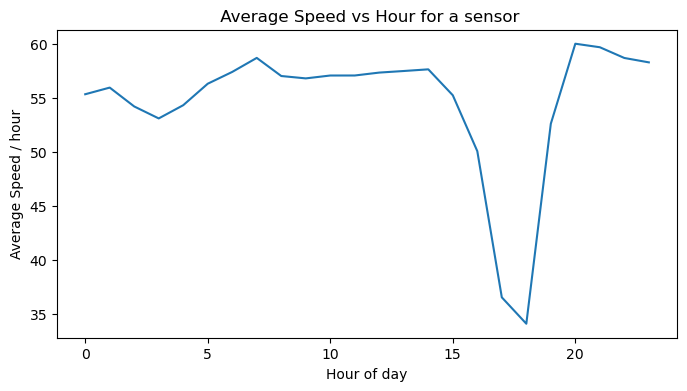

In [12]:
hour_speed = df.groupby('hour')['773869'].mean()
plt.figure(figsize=(8, 4))
plt.plot(hour_speed.index,hour_speed.values )   # hour vs speed
plt.xlabel('Hour of day')
plt.ylabel('Average Speed / hour')
plt.title(' Average Speed vs Hour for a sensor')
plt.show()

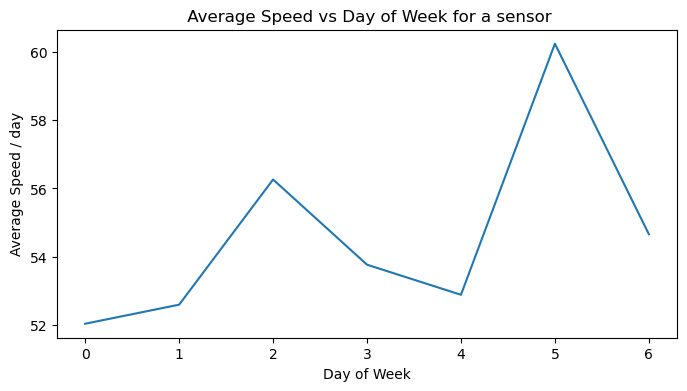

In [13]:
day_speed = df.groupby('day_of_week')['773869'].mean()
plt.figure(figsize=(8, 4))
plt.plot(day_speed.index,day_speed.values )   # hour vs speed
plt.xlabel('Day of Week')
plt.ylabel('Average Speed / day')
plt.title(' Average Speed vs Day of Week for a sensor')
plt.show()

In [31]:
#Training on Random Forest model after Linear Regression failed
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)


In [32]:
mean_absolute_error(Y_test, y_pred_rf)


14.089988591158363

In [33]:
mse_rf =mean_squared_error(Y_test, y_pred_rf)

In [34]:
np.sqrt(mse_rf)

np.float64(21.153134822880084)

In [35]:
r2_score(Y_test, y_pred_rf)

0.14283299414838913